## Import Librairies 

In [92]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from glob import glob
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import librosa as lr
import tensorflow as tf
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import librosa as lr
from librosa import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn import metrics as met
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

## Chargement des données

In [2]:
data = '../../Datatrain/FieldR/wav-2'
csv_file = '../../DataTrain/FieldR/ff1010bird_metadata_2018.csv'
audio_files = glob(data + '/*.wav')
wav = '.wav' 
df = pd.read_csv(csv_file)

# Etude des données d'apprentissage 



## Class Distribution
#### Pourcentage des audios avec présence ou absence d'oiseau 

In [84]:
sound_names = df ['itemid']

classes = list(np.unique(df.hasbird))
class_dist = df.groupby(['hasbird'])['hasbird'].count()

classes
class_dist


hasbird
0    5755
1    1935
Name: hasbird, dtype: int64

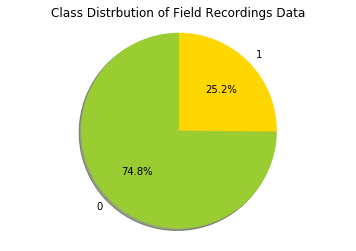

In [88]:
colors = ['yellowgreen', 'gold']

plt.pie(class_dist, labels=classes, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title("Class Distrbution of Field Recordings Data")
plt.savefig('PieChart01.png')
plt.show()

## Different Visualization of the audios 

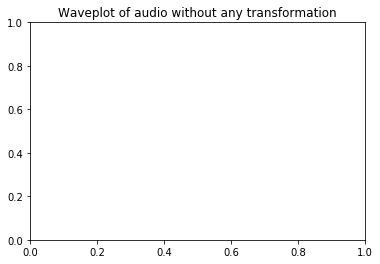

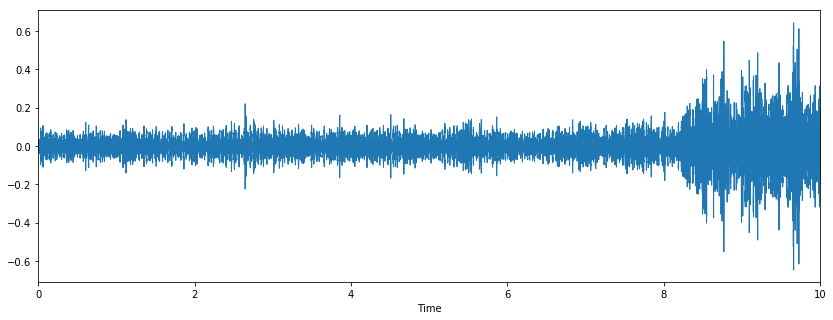

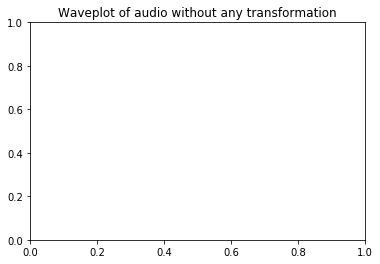

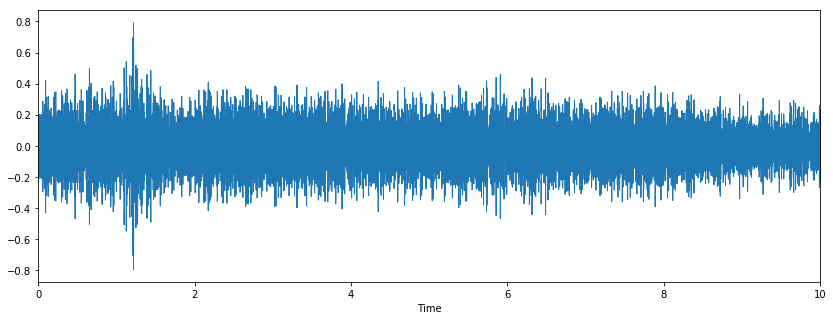

In [120]:
test_sound_with = "../../Datatrain/FieldR/wav-2/19037.wav"
test_sound_without = "../../Datatrain/FieldR/wav-2/55.wav"

audio_files = glob(data + '/*.wav')
wav = '.wav'

def plot_wave_givenoption(wave, option=''):
    
    #### Plot of the wave ###
    plt.title("Waveplot of audio without any transformation")
    plt.figure(figsize=(14, 5))
    y, sr = lr.load(wave)
    lr.display.waveplot(y , sr=sr)

    #### Plot with the option given ####
    #plt.figure(figsize=(14, 5))
    if (option == 'Melspectogramme'):
        mel = lr.feature.melspectrogram(y, sr=sr)
        lr.display.specshow(mel , sr=sr , x_axis='time', y_axis='hz')
    elif(option == "Stft"):
        X = lr.stft(y)
        Xdb = lr.amplitude_to_db(abs(X))
        lr.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    elif(option == "Mfcc"):
        Y = lr.feature.mfcc(y=y, sr=sr)
        lr.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #plt.show()
    #plt.title(option)
    

plot_wave_givenoption(test_sound_with)
plot_wave_givenoption(test_sound_without)

In [ ]:
## figure des melspectrogram
mel = librosa.feature.melspectrogram(y, sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mel , sr=sr , x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('melspectrogram')

## figure des Sftf
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('STFT')

##figure des mfcc
Y = librosa.feature.mfcc(y=y, sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('MFCC')

In [4]:
df = pd.read_csv(csv_file)
nom_des_sons = df ['itemid']

tableau = []
for sons in nom_des_sons:
    tableau.append (sons)

Dico_mel = []
Dico_mfcc = []
Dico_stft = []

In [6]:
for i in tableau:
    son = str(i) + wav 
    audio = '../../Datatrain/FieldR/wav-2/'+son
    y, sr = lr.load(audio)
    mel = np.mean(lr.feature.melspectrogram(y, sr=sr).T,axis=0)
    ##mfcc = np.mean(lr.feature.mfcc(y, sr=sr, n_mfcc=40).T,axis=0)
    ##stft = np.abs(lr.stft(y))
    Dico_mel.append(mel)
    ##Dico_mfcc.append(mfcc)
    ##Dico_stft.append(stft)

## Plot Function for ROC Curve

In [118]:
def plot_roc_curve(fpr, tpr, title):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve' + title)
    plt.legend()
    plt.show()

# Perceptron

In [80]:
X = Dico_mel
Y = labels

X_train, X_test, y_train, y_test = train_test_split(X, Y)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)


/Users/viniya/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


AUC: 0.550


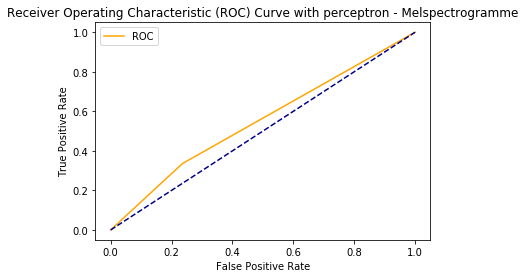

In [119]:
# calculate AUC
auc = met.roc_auc_score(y_pred, y_test)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = met.roc_curve(y_pred, y_test)
plot_roc_curve(fpr, tpr, " with perceptron - Melspectrogramme")

## SVM

In [ ]:
svm= svm.SVC(kernel='linear' , C=1)
## rdf: noyau gaussien , savoir 

In [ ]:
scores = cross_val_score (svmm , X , Y , cv=2)
scores

In [ ]:
# calculate AUC
auc = met.roc_auc_score(y_pred, y_test)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = met.roc_curve(y_pred, y_test)
plot_roc_curve(fpr, tpr, " for SVM with MFCC")

## MLP

In [ ]:
mlp  =  MLPClassifier ( hidden_layer_sizes = ( 13 , 13 , 13 ), max_iter = 500 )

In [9]:
len (Dico_mel)

7690

In [26]:
Dico_mel = np.array(Dico_mel)
print("Dico", Dico_mel.shape)

Dico (7690, 128)


In [42]:
Dico_mel[0]

array([6.97336822e-03, 1.14489605e+00, 2.24332945e+01, 1.45199564e+01,
       5.35309527e+00, 1.18183188e+01, 3.69840042e+00, 2.94994656e+00,
       1.52266613e+00, 2.84937042e+00, 4.15110292e+00, 5.68864863e+00,
       2.92412502e+00, 3.69830877e+00, 1.74840523e+01, 2.24228569e+01,
       2.81086576e+00, 3.90381985e+00, 1.48639926e+00, 8.03328066e+00,
       1.09802132e+01, 8.03767618e+00, 2.52016970e+00, 3.37440010e+00,
       3.51974971e-01, 3.85248514e-01, 7.33420266e-01, 1.66803372e-01,
       7.99852356e-01, 3.37882065e+00, 6.95551114e+00, 1.59433156e+01,
       1.83648256e+00, 1.03709121e+00, 1.35423500e+00, 3.12507929e+00,
       7.24850797e-01, 8.85872707e-01, 1.42158014e+00, 6.25723926e+00,
       1.35627675e+00, 2.19613528e+00, 7.34969793e-01, 5.16750367e+00,
       2.39996353e+00, 1.20967134e+01, 8.01398576e+00, 2.85662521e-01,
       9.72019409e-02, 1.79928050e+00, 1.14712168e+01, 1.31168560e+00,
       1.42211465e-01, 7.37822764e-01, 7.14656800e+00, 2.82190065e+00,
      

## Building our first CNN Model

In [45]:
class our_first_CNN:
    
    def __init__(self):
        self.name = "First CNN Model"
    
    def create_model(self):
        model = tf.keras.Sequential()
        input_shape=(128, 431, 1)

        model.add(tf.keras.layers.Conv2D(16, (3, 3), strides=(1, 1), input_shape=input_shape))
        model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(1, 1)))
        model.add(tf.keras.layers.Activation('relu'))

        model.add(tf.keras.layers.Conv2D(16, (3, 3), padding="valid"))
        model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(1, 1)))
        model.add(tf.keras.layers.Activation('relu'))

        model.add(tf.keras.layers.Conv2D(16, (3, 1), padding="valid"))
        model.add(tf.keras.layers.MaxPooling2D((3, 1), strides=(1, 1)))
        model.add(tf.keras.layers.Activation('relu'))

        model.add(tf.keras.layers.Conv2D(16, (3, 1), padding="valid"))
        model.add(tf.keras.layers.MaxPooling2D((3, 1), strides=(1, 1)))
        model.add(tf.keras.layers.Activation('relu'))

        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dropout(rate=0.5))

        model.add(tf.keras.layers.Dense(256))
        model.add(tf.keras.layers.Activation('relu'))
        model.add(tf.keras.layers.Dropout(rate=0.5))

        model.add(tf.keras.layers.Dense(32))
        model.add(tf.keras.layers.Activation('relu'))
        model.add(tf.keras.layers.Dropout(rate=0.5))

        model.add(tf.keras.layers.Dense(2))
        model.add(tf.keras.layers.Activation('softmax'))
        
    def train(self):
        model.compile(
            optimizer="Adam",
            loss="categorical_crossentropy",
            metrics=['accuracy'])

        model.fit(
            x=X_train, 
            y=y_train,
            epochs=12,
            batch_size=128,
            validation_data= (X_test, y_test))
        
    def score(self):
        score = model.evaluate(
            x=X_test,
            y=y_test)

In [31]:
labels = df ['hasbird'] 
labels = np.array(labels)
#len(labels)

In [25]:
X = Dico_mel
Y = labels

## Data pre-procesing

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

X_train = np.array([x.reshape( (128, 431, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 431, 1) ) for x in X_test])

y_train = np.array(tf.keras.utils.to_categorical(y_train, 2))
y_test = np.array(tf.keras.utils.to_categorical(y_test, 2))

ValueError: cannot reshape array of size 128 into shape (128,431,1)

## Creating our new CNN

In [48]:
cnn = our_first_CNN()

## Training

In [ ]:
cnn.train()

## Evaluating

In [ ]:
cnn.score()